#**Titanic - Machine Learning Titanic dataset from Kagle**

## **Importing needed libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import seaborn as sns

## Load Titanic data from Github

In [2]:
# load in titanic data set
def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

train_data, test_data = load_titanic_data()

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [6]:
train_data['Survived'].value_counts()  # Count the number of survivors and non-survivors

,count
Survived,
0,549
1,342


In [7]:
train_data['Sex'].value_counts()  # Count the number of survivors and non-survivors

,count
Sex,
male,577
female,314


In [8]:
train_data.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train_data.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Survived', ylabel='count'>

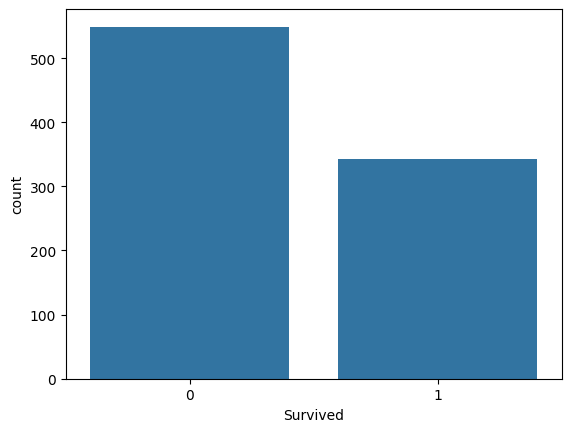

In [10]:
sns.countplot(x='Survived', data=train_data)

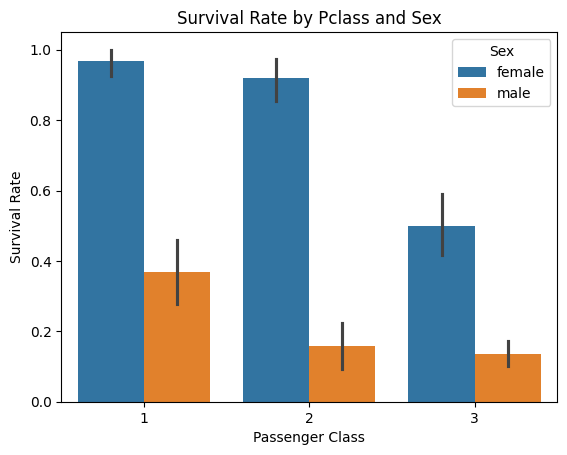

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

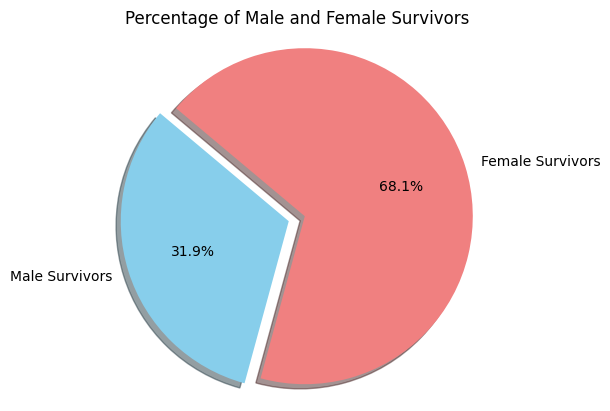

In [12]:
# Calculate the percentage of male and female survivors
survivor_counts = train_data[train_data['Survived'] == 1]['Sex'].value_counts()
total_survivors = survivor_counts.sum()
male_survivor_percentage = (survivor_counts['male'] / total_survivors) * 100
female_survivor_percentage = (survivor_counts['female'] / total_survivors) * 100

# Create the pie chart
labels = ['Male Survivors', 'Female Survivors']
sizes = [male_survivor_percentage, female_survivor_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Male and Female Survivors')
plt.show()


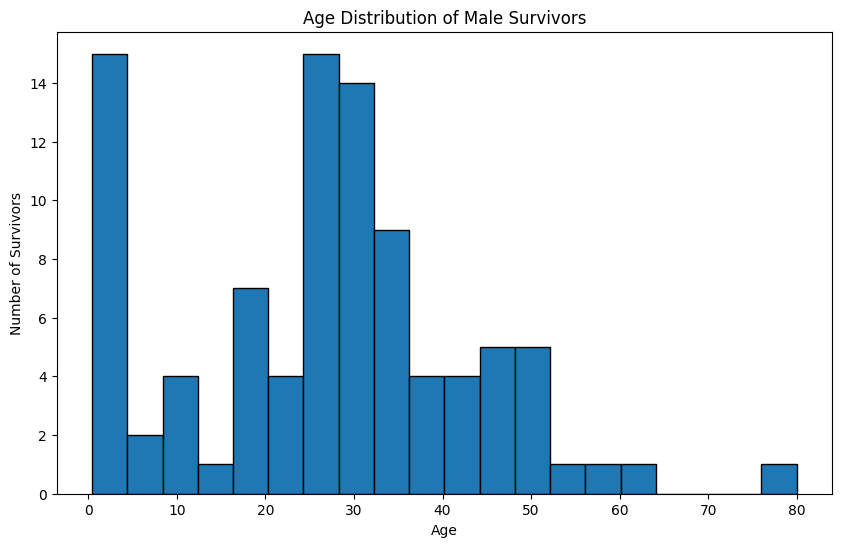

In [13]:
# Filter for male survivors
male_survivors = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'male')]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(male_survivors['Age'].dropna(), bins=20, edgecolor='black')  # Use dropna() to handle missing values
plt.title('Age Distribution of Male Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

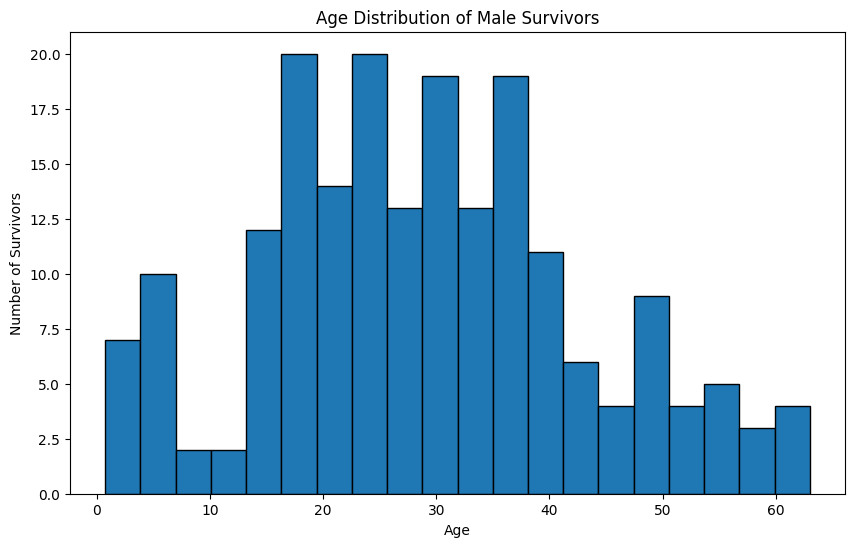

In [14]:
# Filter for male survivors
female_survivors = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'female')]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(female_survivors['Age'].dropna(), bins=20, edgecolor='black')  # Use dropna() to handle missing values
plt.title('Age Distribution of Male Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()


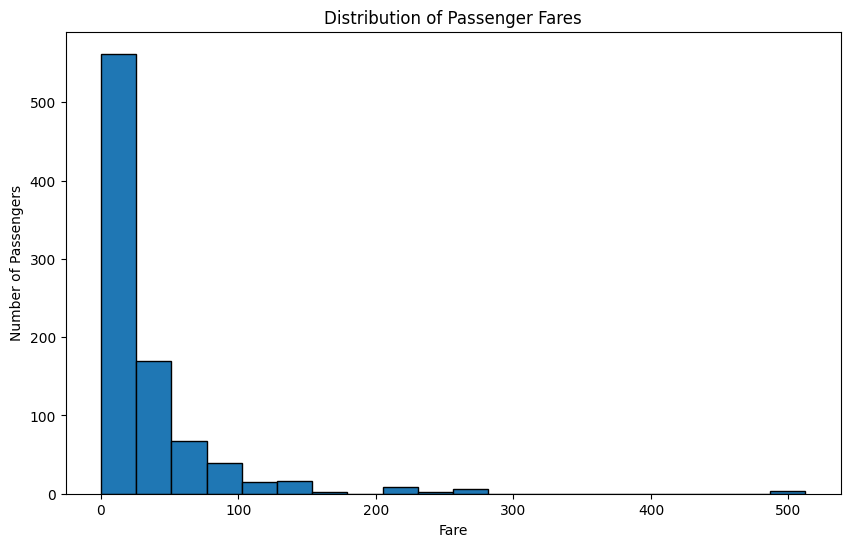

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Fare'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

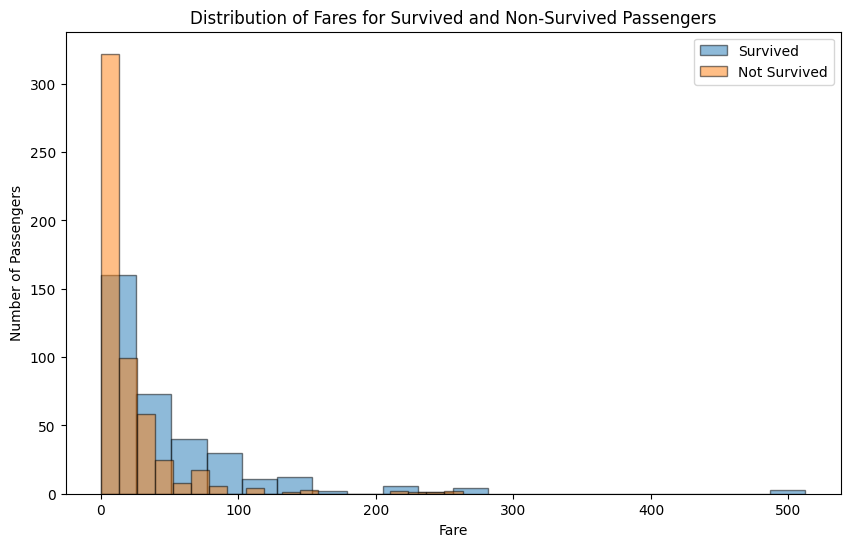

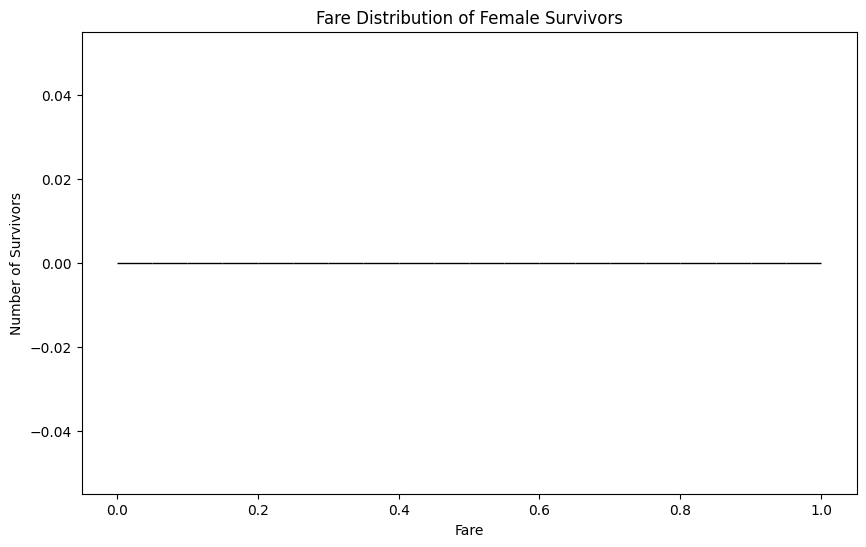

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=20, alpha=0.5, label='Survived', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=20, alpha=0.5, label='Not Survived', edgecolor='black')

plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Fares for Survived and Non-Survived Passengers')
plt.legend()
plt.show()


female_survivors = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'female')]

plt.figure(figsize=(10, 6))
plt.hist(female_survivors['Fare'], bins=20, edgecolor='black')
plt.title('Fare Distribution of Female Survivors')
plt.xlabel('Fare')
plt.ylabel('Number of Survivors')
plt.show()


In [58]:
# Group data by cabin and sex, then calculate the average fare
average_fare_by_cabin_sex = train_data.groupby(['Pclass', 'Sex'])['Fare'].mean().unstack()

# Display the table
print(average_fare_by_cabin_sex)

Sex              0          1
Pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633


In [59]:
# Group data by cabin and sex, then calculate the average fare
parch_and_sex = train_data.groupby(['Parch', 'Sex'])['Fare'].mean().unstack()

# Display the table
print(parch_and_sex)

Sex            0           1
Parch                       
0      39.826591   19.879078
1      46.987292   46.561857
2      63.231292   66.086290
3      23.845825   34.375000
4      24.487500  145.450000
5      32.868750   31.275000
6      46.900000         NaN


## Find the attributes that have NaN values

In [15]:
nan_attributes = train_data.columns[train_data.isna().any()].tolist()
nan_attributes


['Age', 'Cabin', 'Embarked']

### Fill in values for age that are NaN

In [16]:
# Fill in missing values for age
# Calculate the median age
median_age = train_data['Age'].median()

# Fill NaN values with the median age
train_data['Age'].fillna(median_age, inplace=True)

<ipython-input-16-719b3ff5606b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(median_age, inplace=True)


In [17]:
median_ages_by_embarked = train_data.groupby('Embarked')['Age'].median()

In [18]:
# fill in age values
for i in range(len(train_data)):
    if np.isnan(train_data.loc[i, 'Age']):
        train_data.loc[i, 'Age'] = median_ages_by_embarked[train_data.loc[i, 'Embarked']]

### Fill in missing 'Cabin' and 'Embarked' with unknown

In [19]:
# fill in missing cabin values
train_data['Cabin'].fillna('Unknown', inplace=True)

train_data['Embarked'].fillna('Unknown', inplace=True)

<ipython-input-19-bfc561ba2406>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna('Unknown', inplace=True)
<ipython-input-19-bfc561ba2406>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [20]:
nan_attributes = train_data.columns[train_data.isna().any()].tolist()
nan_attributes

[]

# Encode categorical data

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [22]:
# this will convert sex and embarked into numerical data -- Name will be dropped from the dataset, name has no affect on the outcome
cols = ['Sex', 'Ticket', 'Cabin', 'Embarked']
label_encoder = LabelEncoder()

for col in cols:
    # Ensure the column is a 1D array before applying LabelEncoder
    train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2


## Now categorical values are converted to numerical values

# Gaussian NB Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [62]:
train_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,275,8.4583,147,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,85,51.8625,129,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,395,21.0750,147,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,344,11.1333,147,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,132,30.0708,147,0


In [25]:
# select attributes for prediction, and select target value
#features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

In [26]:
# initialize Scaler
scaler = StandardScaler()

In [27]:
# train test split
X = train_data[features]
y = train_data[target]
X_train = train_data[features]
y_train = train_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# create model and train model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [29]:
# make predictions
y_pred = model.predict(X_test_scaled)

## Gaussian Naive Bayes Model Evaluation

In [30]:
# evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5)

In [32]:
cv_score

array([0.784     , 0.808     , 0.768     , 0.7016129 , 0.75806452])

In [33]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.8171641791044776

In [34]:
_confusion_matrix = confusion_matrix(y_test, y_pred)
print(_confusion_matrix)

[[133  24]
 [ 25  86]]


In [35]:
cr = classification_report(y_test, y_pred)

In [36]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       157
           1       0.78      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



# SGD Classifier

## Import SGDClassifier Library

In [37]:
from sklearn.linear_model import SGDClassifier

## Create model and fit model

In [38]:
# Train and fit the model
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

## SGDClassifier Predictions

In [39]:
# make predictions
y_pred_sgd = sgd.predict(X_test_scaled)

## SGDClassifier Model Metrics

In [40]:
_sgd_cvs = cross_val_score(sgd, X_train_scaled, y_train, cv=5)
_sgd_cvs

array([0.752     , 0.744     , 0.744     , 0.69354839, 0.7016129 ])

In [41]:
# Accuracy
_sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
_sgd_accuracy

0.7985074626865671

In [42]:
_sgd_cm = confusion_matrix(y_test, y_pred_sgd)
print(_sgd_cm)

[[131  26]
 [ 28  83]]


In [43]:
_sgd_classification_report = classification_report(y_test, y_pred_sgd)
print(_sgd_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.75      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



# Predict to see if you will survive

In [44]:
def predict_survival(model, attributes):
  prediction = model.predict(attributes)
  if prediction == 1:
    return "Survived"
  else:
    return "Did not survive"

In [47]:
your_info = [1,1,31,0,0,523,7.25,81,2]

In [51]:
print(predict_survival(model, [your_info]))

Survived


In [46]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2
